# Exercise 9: Magnetic resonance (III)

> *Type name(s) of participant(s):*

Necessary imports and function definitions (run this block before any other code):

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def load_data(want_plot = 1):
    # Define useful quantities
    nx = 382    # Number of pixels in the x-direction
    ny = 482    # Number of pixels in the y-direction
    nt = 200    # Number of time intervals = number of measurements (every 3 s for 10 min)
    
    # Define and initialize the different objects
    fmri_data = np.zeros([ny,nx,nt])
    anatomical_data = np.zeros([ny,nx])
    paradigm = np.zeros(nt)
    
    # Read the binary (.bin) files
    
    # Paradigm data
    file_name = 'paradigm.bin'
    with open(file_name, 'rb') as fid:
        paradigm[:] = np.fromfile(fid, np.float32,nt)
    
    # Anatomical data
    file_name = 'anatomical_data.bin'
    with open(file_name, 'rb') as fid:
        data = np.fromfile(fid, np.float32,ny*nx)
    
    anatomical_data = np.reshape(data,[ny,nx],order='F')
    del data
    
    # fMRI data
    file_name = 'fMRI_data.bin'
    with open(file_name, 'rb') as fid:
        data = np.fromfile(fid, np.float32,ny*nx*nt)
    
    fmri_data = np.reshape(data,[ny,nx,nt],order='F')
    del data
    
    if want_plot:
        fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
        ax[0].imshow(anatomical_data, cmap='gray', vmin=0, vmax=255)
        ax[0].set_title('Anatomical data')
        
        ax[1].plot(np.linspace(1,nt,nt),paradigm)
        ax[1].set_title('Paradigm')
        ax[1].set_xlabel('Repetiton')
        ax[1].set_ylabel('Flickering pattern input')
        
        fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(16, 8))
        for k in range(10):
            if k < 5:
                j = 0
            else:
                j = 1
            ax[j,k%5].imshow(fmri_data[:,:,20*k], cmap='gray', vmin=0, vmax=255)
            ax[j,k%5].set_title('fMRI frame '+str(20*k+1))
         
    return [nx,ny,nt,paradigm,anatomical_data,fmri_data]

# Introduction

The topic of this exercise is functional MRI (fMRI) of the brain. The goal is to detect brain activity based on a time series of images obtained while stimulating the brain with visual input.

Imaging was limited to a single transverse slice and performed using an echo-planar imaging (EPI) acquisition, scanning all of _k_-space for each image in one go (acquisition time $T_{\textrm{acq}}$ = 40 ms). Imaging was repeated every 3 seconds for 10 minutes, yielding a total of 200 frames for this fMRI study.

During these 10 minutes, the brain was stimulated by visual presentation of on-off flickering patterns (see Figure 1). The stimulation scheme (or so-called _paradigm_) consisted of alternating between the two complementary wedge patterns shown below, switching every minute for a total of 10 episodes (see Figure 2).

<img src="./Img.png" width="800">

In the following tasks, you will attempt to match the paradigm with the measured brain activity.

The prepared code reads in:
* A high-resolution anatomical image of the slice (482 $\times$ 382 real matrix)
* The paradigm (200-element vector of 1's and -1's), as plotted in Figure 2
* The fMRI data set (482 $\times$ 382 $\times$ 200 real matrix): a low-resolution image of the slice for each of the 200 acquisitions

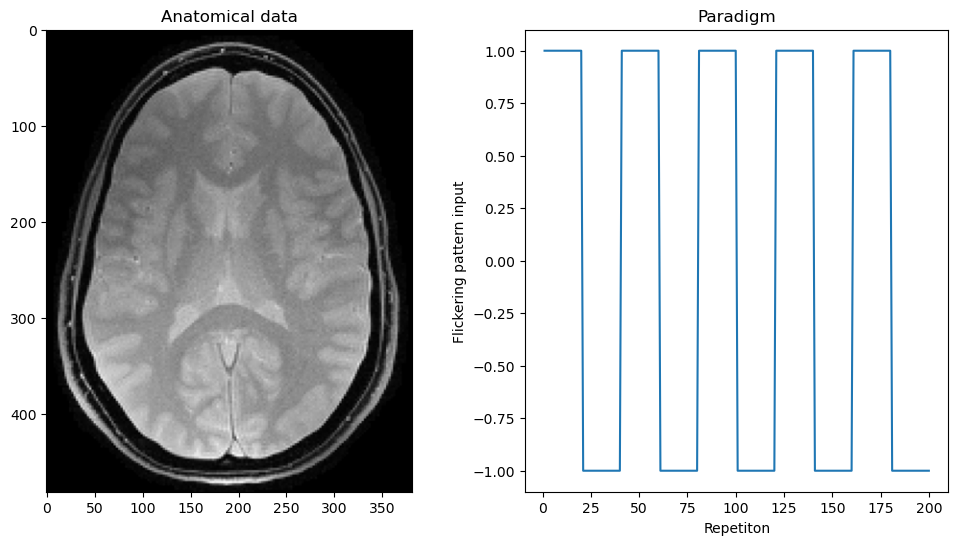

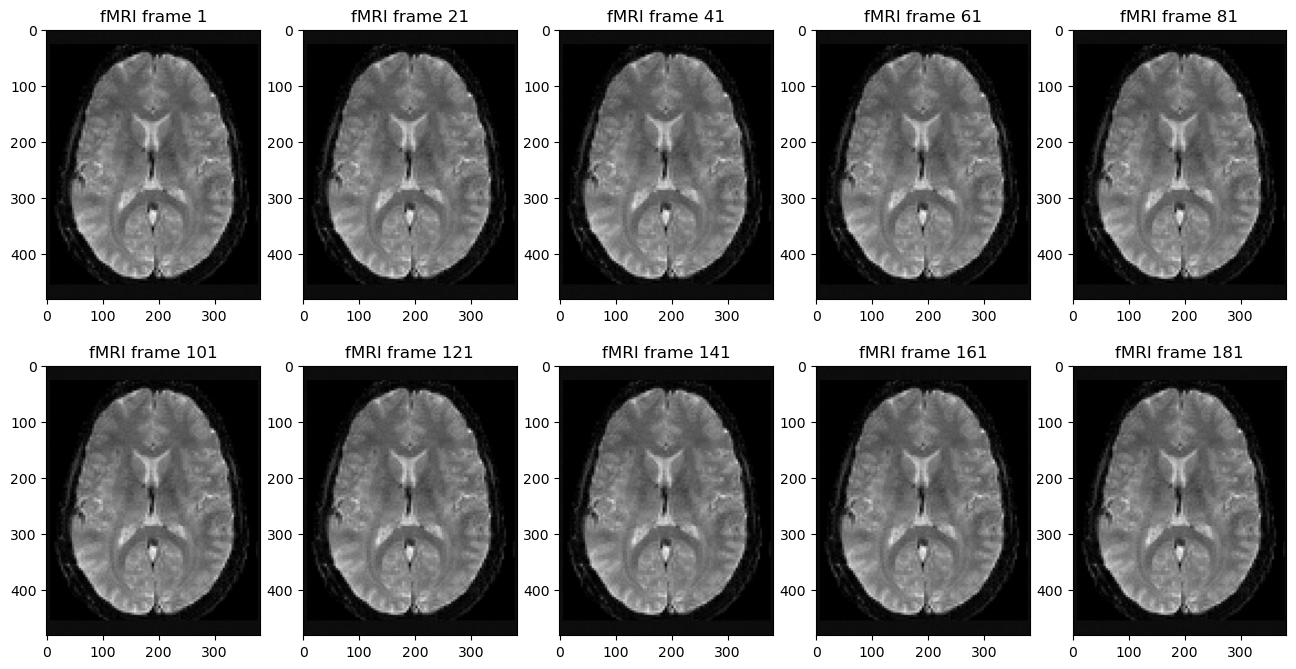

In [3]:
[nx,ny,nt,paradigm,anatomical_data,fmri_data] = load_data(1)  # Input 0/1 to disable/enable the plotting of the loaded data

## Task 1
>Display and study the signal time series of individual pixels of your choice from the fMRI data. Try to find pixels whose temporal fluctuation resembles the paradigm. Where are such pixels located?
<br>
><br>*Hint: Do this for a few pixels only. If you can't find any, first solve Task 2.*

405 179


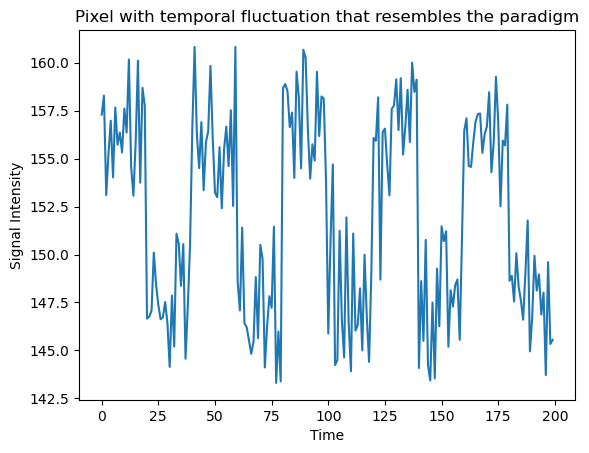

In [27]:
# Type your code in this cell:
diff_2 = np.inf
for i1 in range(482): 
    for i2 in range(382) :
        fmri_vox = fmri_data[i1, i2, :]
        fmri_vox = 2 * (fmri_vox - np.min(fmri_vox)) / (np.max(fmri_vox) - np.min(fmri_vox)) - 1
        diff = np.sum(np.abs(fmri_vox - paradigm))      
        if  diff<diff_2:
           diff_2=diff 
           y, x = i1, i2

print (y, x)
plt.plot(np.squeeze(fmri_data[y, x, :]))
plt.title('Pixel with temporal fluctuation that resembles the paradigm')
plt.xlabel('Time')
plt.ylabel('Signal Intensity')
plt.show()

*Type your answer in this cell:*

## Task 2
>Now, we want to quantify the resemblance of the pixel time series with the visual paradigm in a systematic and quantitative manner. In order to do so, we will to use the scalar product between the two to compute the so-called _activation map_.<br>
><br>Calculate the scalar product of the pixel time series and the paradigm for all pixels. Display the resulting activation map as an image.
<br>
><br>*Hint: Here, the scalar product is simply the product summed over time. Formally, if $\bold{s} \in \mathbb{R}^{(200)}$ is the signal time series of a given pixel and $\bold{P} \in \mathbb{R}^{(200)}$ is the paradigm, then the scalar product is defined as $<\bold{s},\bold{P}> = \sum_{n=1}^{200}s_n\cdot P_n\,$*.

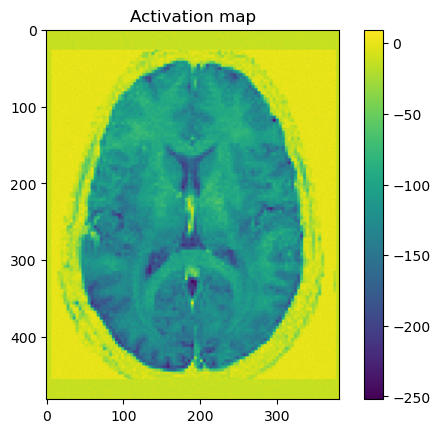

In [5]:
# Type your code in this cell:
sp = np.zeros((ny, nx, nt))
for i in range(nt):
    sp[:, :, i] = sp[:, :, i] + fmri_data[:, :,i ] * paradigm[i ]
plt.figure(4)
plt.imshow(sp[:, :, nt-1]) 
plt.title('Activation map')
plt.colorbar()  
plt.show()

## Task 3
>Calculate the temporal standard deviation of the fMRI time series and display it as a map. Estimate the thermal noise level from an area without activation.
<br>
><br>*Hint: Display the logarithm of the standard deviation map to enhance the contrast.*

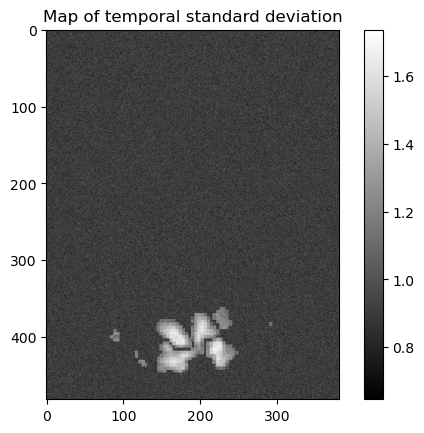

Noise Level: 2.478256


In [6]:
# Type your code in this cell:
deviation = np.std(fmri_data, axis=2, ddof=1)
log_deviation = np.log(deviation)

stds = []
for y in range(100,200):
    for x in range(100,200):
        std_dev = np.std(fmri_data[y, x, :], ddof=1) 
        stds.append(std_dev)
      
noise_level = np.mean(stds)

plt.figure(5)
plt.imshow(log_deviation, cmap='gray')
plt.title('Map of temporal standard deviation')
plt.colorbar() 
plt.show()

print("Noise Level:",noise_level)

## Task 4
>To distinguish activations from noise, choose a threshold and mask the activation map accordingly. Display the masked activation superimposed onto the anatomical data. Propose an interpretation of the result. What does the sign of the activation indicate?

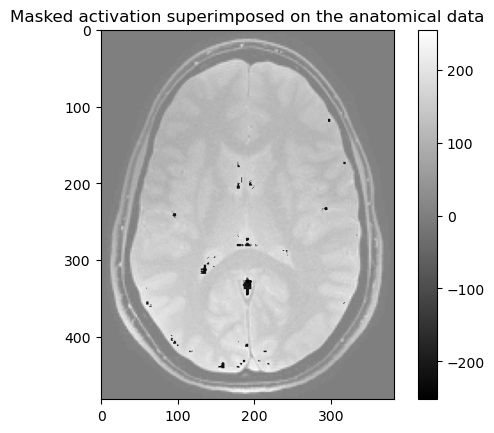

In [18]:
# Type your code in this cell:
threshold = 200
mask = np.abs(sp[:, :, nt-1]) > threshold
mask_sp = anatomical_data * (~mask) +  sp[:, :, nt-1] *mask
plt.figure(6)
plt.imshow(mask_sp, cmap='gray')
plt.title('Masked activation superimposed on the anatomical data')
plt.colorbar()
plt.show()         

*Type your answer in this cell:* We filtered out the part which activation is lower than the threshold .The sign of the activation indicates different severity of respond from different parts of brain resulting from stimulates.